In [6]:
# File Management
import sys

# Data Management
import pandas as pd
import numpy as np

# Reporting
import matplotlib.pyplot as plt

# Formatting
import json
import datetime as dt

In [7]:
dates = []
weighted_means = []

start_date = dt.datetime(2020, 6, 1)
end_date = dt.datetime(2023, 2, 10)
delta = dt.timedelta(days=1)

while start_date <= end_date:
    date = str(start_date.strftime('%Y-%m-%d'))
    dir = str(start_date.strftime('%Y-%m'))
    file = f'{sys.path[0]}/Datasets/{dir}/{date}.json'
    means = []
    counts = []
    weights = []
    weighted_values = []

    if date not in dates:
        dates.append(date)

    f = open(file)
    data = json.load(f)

    for i in range(len(data)):
        means.append(data[i]['mean'])
        counts.append(data[i]['count'])

    f.close()

    for i in counts:
        weights.append((i / sum(counts)))

    for i in range(len(means)):
        weighted_values.append(means[i] * weights[i])

    weighted_means.append(sum(weighted_values))
    means.clear()
    counts.clear()
    weights.clear()
    weighted_values.clear()
    start_date += delta

result = zip(dates, weighted_means)
df = pd.DataFrame(result, columns=['Date', 'Sentiment Score (Weighted Mean)'])
df = df.set_index('Date')
print(df)

            Sentiment Score (Weighted Mean)
Date                                       
2020-06-01                         0.205507
2020-06-02                         0.181423
2020-06-03                         0.224390
2020-06-04                         0.224576
2020-06-05                         0.240114
...                                     ...
2023-02-06                         0.225897
2023-02-07                         0.243800
2023-02-08                         0.241560
2023-02-09                         0.222769
2023-02-10                         0.229088

[985 rows x 1 columns]


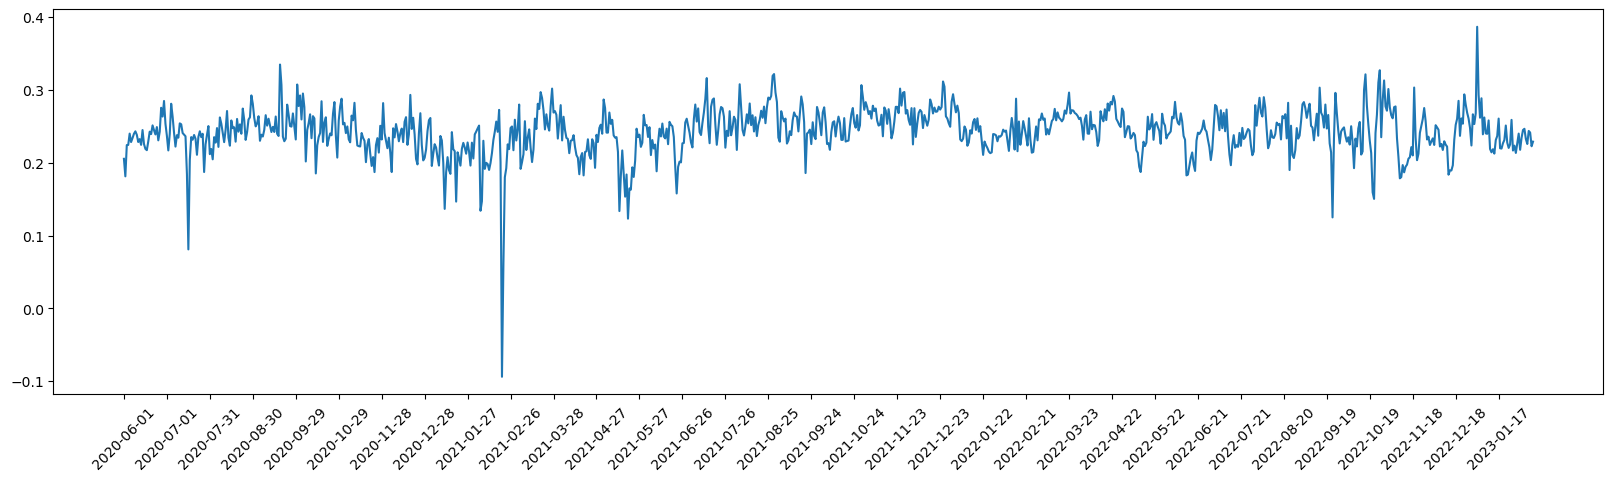

In [81]:
plt.figure(figsize=(20,5))
plt.plot(dates, weighted_means)
plt.xticks(np.arange(0, len(dates), 30), rotation=45)
plt.show()